In [89]:
import seaborn
from rdkit.Chem import AllChem as ch
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
import matplotlib

import math

In [13]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
mols = [m for m in supp if m is not None]

In [15]:
drugbank = {}

lip_func = [Lipinski.NumHAcceptors, Lipinski.NumHDonors, Descriptors.ExactMolWt, Descriptors.MolLogP,
            rdMolDescriptors.CalcTPSA, Lipinski.NumRotatableBonds]

for mol in mols:
    drugbank[mol.GetProp("DRUGBANK_ID")] = [f(mol) for f in lip_func]
    

In [ ]:
data = [[f(mol) for f in lip_func] for mol in mols]

In [20]:
drugbank["DB00006"], data[7]

([29, 28, 2178.9858128759984, -8.116429999999927, 901.5700000000003, 66],
 [5, 3, 247.02457367000002, 0.51742, 116.95, 4])

In [44]:
#scaling
sc_data = preprocessing.scale(data)

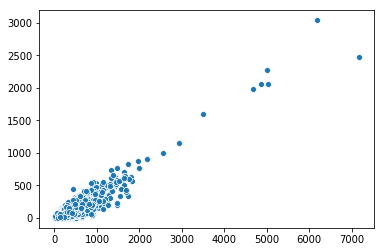

In [50]:
seaborn.scatterplot(x=[x[2] for x in data], y=[x[4] for x in data])

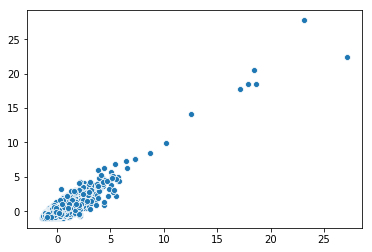

In [49]:
seaborn.scatterplot(x=[x[2] for x in sc_data], y=[x[4] for x in sc_data])

In [28]:
big = [m for m in data if m[2]>5000]
big = big[0]
for k, i in drugbank.items():
    if i == big:
        name = k

name

'DB00638'

In [51]:
pca = decomposition.PCA(n_components=6)
pca.fit(sc_data)
tdata = pca.transform(sc_data)

[0.7384996  0.1761824  0.04328613 0.02631121 0.01055875 0.00516191]


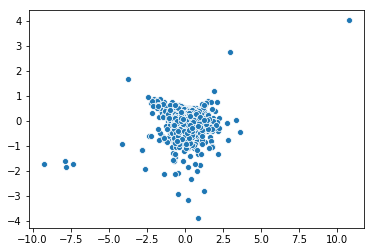

In [58]:
seaborn.scatterplot(x=[x[2] for x in tdata], y=[x[4] for x in tdata])
print(pca.explained_variance_ratio_)

In [68]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [62]:
mfp = [ch.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in mols]

In [79]:
def distance_function(i1, i2, *args):
    d = math.sqrt(sum((x-y)**2 for x,y in zip(sc_data[i1], sc_data[i2])))
    return d

In [82]:
picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(sc_data), 20, seed=666))
picked

[4982,
 523,
 4473,
 4502,
 454,
 1147,
 3035,
 2563,
 4503,
 4407,
 4387,
 591,
 6751,
 253,
 6659,
 6972,
 0,
 1011,
 3547,
 6847]

In [85]:
import pandas as pd

In [92]:
tframe = pd.DataFrame(tdata, columns=["x", "y", "z", "a", "b", "c"])
tframe["picked"] = [x in picked for x,y in enumerate(data)]
tframe

,x,y,z,a,b,c,picked
0,15.728622,-1.789780,-2.795449,-0.400205,-1.182877,-0.536591,True
1,7.663903,-0.607444,-1.142082,-0.914234,-0.688225,-0.139886,False
2,6.023255,0.439359,-0.223815,-0.845135,-0.751416,-0.195471,False
3,8.121402,-1.902266,-1.492582,-0.792220,-0.741134,-0.055543,False
4,3.409231,-1.958399,0.862036,0.031457,-1.328286,-0.125316,False
5,5.585449,0.348541,-0.153565,-0.391660,-0.783616,-0.174859,False
6,4.915698,-0.349828,-0.011135,-1.024367,-0.443638,0.297748,False
7,-0.133674,0.554298,-0.070332,-0.068145,0.142335,-0.174006,False
8,5.750554,-1.883783,1.636752,-0.653948,-0.665103,-0.560674,False
9,1.905163,0.491802,-0.179983,-0.614831,0.300437,-0.043803,False


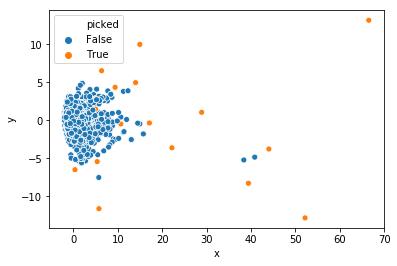

In [93]:
seaborn.scatterplot(x="x", y="y", data = tframe, hue = "picked")